# MNIST Digit Classification with CNN

This notebook demonstrates how to build and train a Convolutional Neural Network (CNN) to recognize handwritten digits (0–9) from the MNIST dataset using TensorFlow/Keras.

- **Dataset:** MNIST (28x28 grayscale images)
- **Tools:** Python, TensorFlow/Keras, Matplotlib
- **Goal:** Achieve high accuracy in digit recognition


## 1. Import Required Libraries and Load Dataset


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


## 2. Preprocess Data


In [2]:
# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print('Reshaped training data:', x_train.shape)


Reshaped training data: (60000, 28, 28, 1)


## 3. Define CNN Model Architecture


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits
])

model.summary()


c:\codes\mnist-digit-classifier-cnn\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Compile and Train Model


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9591 - loss: 0.1317 - val_accuracy: 0.9872 - val_loss: 0.0440
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9873 - val_loss: 0.0402
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.9904 - loss: 0.0298 - val_accuracy: 0.9902 - val_loss: 0.0353
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9897 - val_loss: 0.0352
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9949 - loss: 0.0159 - val_accuracy: 0.9885 - val_loss: 0.0423


## 5. Evaluate Model Performance


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9888 - loss: 0.0388
Test Accuracy: 0.9887999892234802


## 6. Visualize Training Accuracy


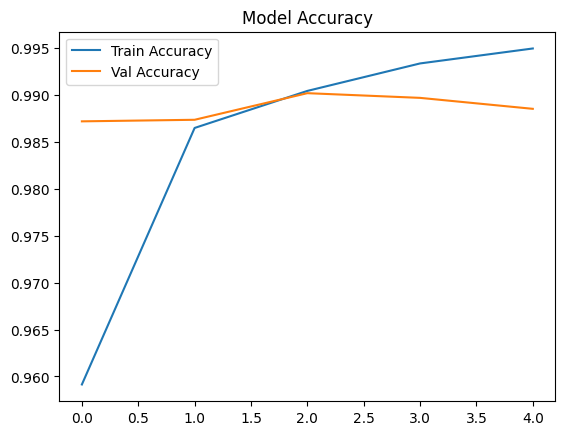

In [6]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.savefig('../outputs/accuracy_plot.png')
plt.show()


## 7. Make Predictions and Display Sample Results


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


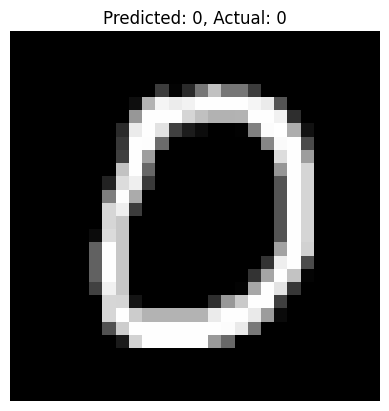

In [7]:
import numpy as np

predictions = model.predict(x_test)

def show_sample(i):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.savefig(f'../outputs/sample_prediction_{i}.png')
    plt.show()

show_sample(10)  # Try different indices
